In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
x=[]
y=[]

In [2]:
for i in range(1,31):
    j='odia digit/0.'+str(i)+'.PNG'
    img = cv2.imread(j,0)
    x.append(img)
    y.append(0)
for i in range(1,31):
    j='odia digit/1.'+str(i)+'.PNG'
    img = cv2.imread(j,0)
    x.append(img)
    y.append(1)
for i in range(1,31):
    j='odia digit/2.'+str(i)+'.PNG'
    img = cv2.imread(j,0)
    x.append(img)
    y.append(2)
for i in range(1,31):
    j='odia digit/3.'+str(i)+'.PNG'
    img = cv2.imread(j,0)
    x.append(img)
    y.append(3)

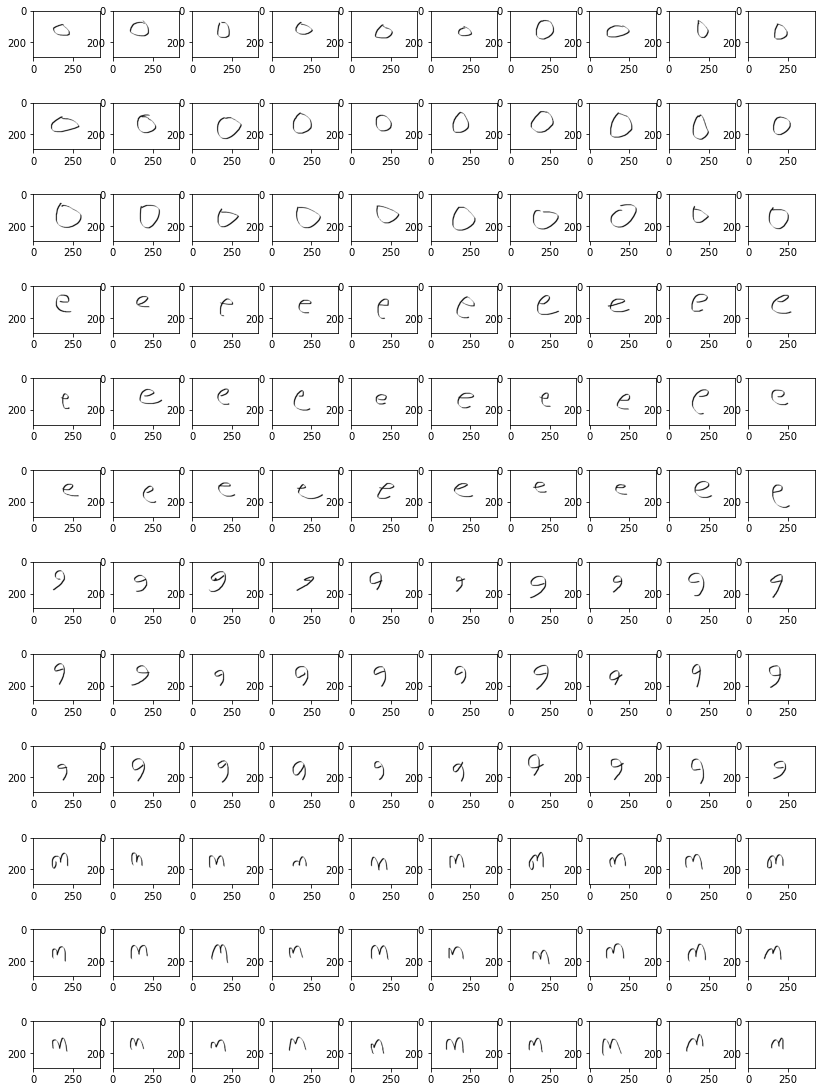

In [3]:
plt.figure(figsize=(14,20))
for i in range(120):
    plt.subplot(12,10,i+1)
    plt.imshow(x[i],'gray')
plt.show()

In [3]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [4]:
x=np.asarray(x)
y=np.asarray(y)

In [5]:
print(x.shape)
print(y.shape)

(120, 293, 417)
(120,)


In [6]:
x=x.reshape(120,293*417)

In [7]:
print(x.shape)

(120, 122181)


In [8]:
x=x/255

In [9]:
from sklearn.model_selection import train_test_split
xtrn,xtst,ytrn,ytst=train_test_split(x,y,test_size=.3)

In [10]:
xtrn.shape

(84, 122181)

In [11]:
ytrn.shape

(84,)

In [12]:
ytrn[0:5]

array([2, 0, 1, 2, 2])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
for i in range(1,16):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(xtrn,ytrn)
    ypred=m.predict(xtst)
    print(i, accuracy_score(ypred,ytst))

1 0.6388888888888888
2 0.6111111111111112
3 0.6111111111111112
4 0.6388888888888888
5 0.6944444444444444
6 0.6666666666666666
7 0.6666666666666666
8 0.6666666666666666
9 0.6111111111111112
10 0.6111111111111112
11 0.5555555555555556
12 0.5277777777777778
13 0.5
14 0.5277777777777778
15 0.5277777777777778


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
for i in range(-3,5):
    m=LogisticRegression(C=10**i,max_iter=20000)
    m.fit(xtrn,ytrn)
    ypred=m.predict(xtst)
    print('10^',i,'---------->' ,accuracy_score(ypred,ytst))

10^ -3 ----------> 0.6666666666666666
10^ -2 ----------> 0.6944444444444444
10^ -1 ----------> 0.7222222222222222
10^ 0 ----------> 0.7222222222222222
10^ 1 ----------> 0.7222222222222222
10^ 2 ----------> 0.7222222222222222
10^ 3 ----------> 0.6944444444444444
10^ 4 ----------> 0.6111111111111112


In [23]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
for i in range(1,100,10):
    m=RandomForestClassifier(max_depth=i)
    m.fit(xtrn,ytrn)
    ypred=m.predict(xtst)
    print(i,'---------->' ,accuracy_score(ypred,ytst))

1 ----------> 0.2222222222222222
11 ----------> 0.6111111111111112
21 ----------> 0.6111111111111112
31 ----------> 0.6388888888888888
41 ----------> 0.6666666666666666
51 ----------> 0.6944444444444444
61 ----------> 0.7222222222222222
71 ----------> 0.6111111111111112
81 ----------> 0.6944444444444444
91 ----------> 0.6111111111111112


In [43]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
for i in range(-5,2):
    m=GaussianNB(var_smoothing=10**i)
    m.fit(xtrn,ytrn)
    ypred=m.predict(xtst)
    print('10^',i,'---------->' ,accuracy_score(ypred,ytst))

10^ -5 ----------> 0.6944444444444444
10^ -4 ----------> 0.6944444444444444
10^ -3 ----------> 0.6944444444444444
10^ -2 ----------> 0.7222222222222222
10^ -1 ----------> 0.7222222222222222
10^ 0 ----------> 0.6388888888888888
10^ 1 ----------> 0.4166666666666667


In [32]:
ypred=model.predict(xtst)

NameError: name 'model' is not defined

In [16]:
ypred

array([1, 0, 1, 1, 3, 0, 1, 3, 2, 1, 0, 2, 1, 1, 0, 2, 3, 1, 0, 1, 1, 1,
       1, 3, 0, 1, 3, 1, 1, 3, 1, 0, 0, 0, 1, 3])

In [17]:
ytst

array([2, 0, 0, 1, 3, 0, 0, 2, 2, 1, 3, 2, 2, 1, 0, 2, 3, 1, 0, 0, 1, 1,
       1, 3, 2, 0, 2, 2, 0, 3, 1, 0, 0, 0, 1, 2])

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ypred,ytst)

array([[6, 0, 0, 0],
       [2, 5, 4, 0],
       [1, 1, 6, 1],
       [0, 0, 1, 9]], dtype=int64)

In [76]:
def Plot_n_Save_Confusion_Matrix(Test,Predict):
    import seaborn as sns
    C = confusion_matrix(Test,Predict)
    P = (C/C.sum(axis=0))
    R = (((C.T)/(C.sum(axis=1))).T)
    
    plt.figure(figsize=(12,4))
    cmap=sns.light_palette('green')
    
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    
    plt.subplot(1,3,2)
    sns.heatmap(P,annot=True,cmap=cmap)
    plt.title('Precision Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    
    plt.subplot(1,3,3)
    sns.heatmap(R,annot=True,cmap=cmap)
    plt.title('Recall Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    
    plt.show
    plt.savefig('Confusion-Precission-Recall Matrix.png')

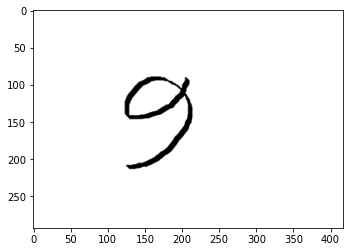

In [22]:
j='odia digit/test.PNG'
img = cv2.imread(j,0)
plt.imshow(img,'gray')
plt.show()

In [23]:
img=np.asarray(img)
img=img.reshape(1,293*417)
print(model.predict(img))

[2]


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [52]:
C1=KNeighborsClassifier(n_neighbors=5)
Meta=RandomForestClassifier()
C3=GaussianNB(var_smoothing=0.1)
C4=LogisticRegression(C=0.1)
#Meta=xgb.XGBClassifier()

In [57]:
from mlxtend.classifier import StackingClassifier
stack_model=StackingClassifier(classifiers=[C1,C3,C4],meta_classifier=Meta)

In [58]:
stack_model.fit(xtrn,ytrn)

c:\users\user\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                GaussianNB(priors=None, var_smoothing=0.1),
                                LogisticRegression(C=0.1, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1...
                                                 monotone_constraints=None,
 

In [59]:
ypred=stack_model.predict(xtst)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(ytst,ypred)

0.7222222222222222

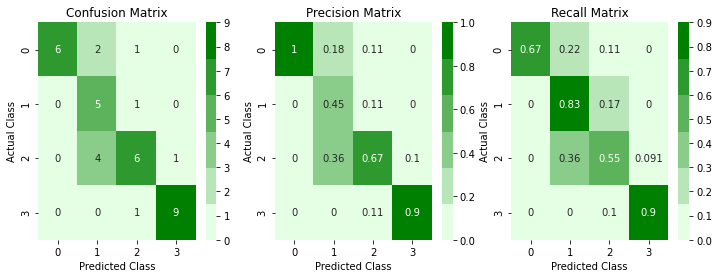

In [78]:
Plot_n_Save_Confusion_Matrix(ytst,ypred)

In [79]:
def F1_Score(Test,Predict):
    import seaborn as sns
    C = confusion_matrix(Test,Predict)
    P = (C/C.sum(axis=0))
    R = (((C.T)/(C.sum(axis=1))).T)
    F = 2*P*R/(P+R)
    plt.figure(figsize=(6,6))
    cmap=sns.light_palette('green')
    
    sns.heatmap(F,annot=True,cmap=cmap)
    plt.title('F1 Score')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    
    plt.show
    plt.savefig('F1 Score.png')

c:\users\user\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


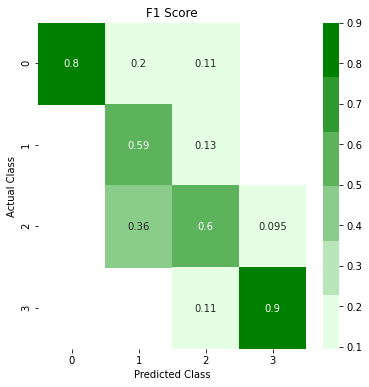

In [80]:
F1_Score(ytst,ypred)

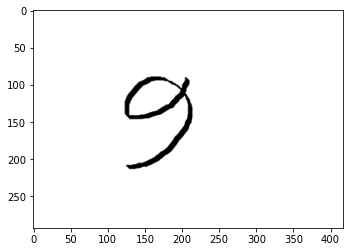

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
j='odia digit/test.PNG'
img = cv2.imread(j,0)
plt.imshow(img,'gray')
plt.show()

In [9]:
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
